In [2]:
import pandas as pd
#Path_prefix =  
data1 = pd.read_csv('turnstile_190504.csv')
data2 = pd.read_csv('turnstile_190511.csv')
data = pd.concat([data1,data2])
data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,00:00:00,REGULAR,7035249,2384833
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,04:00:00,REGULAR,7035269,2384840
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,08:00:00,REGULAR,7035292,2384875
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,12:00:00,REGULAR,7035392,2384951
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,16:00:00,REGULAR,7035651,2385020


In [3]:
type(data['DATE'])

pandas.core.series.Series

In [4]:
data['Date_Time'] = pd.to_datetime(data['DATE'], cache=True) + pd.to_timedelta(data['TIME'])

In [5]:
data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,00:00:00,REGULAR,7035249,2384833,2019-04-27 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,04:00:00,REGULAR,7035269,2384840,2019-04-27 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,08:00:00,REGULAR,7035292,2384875,2019-04-27 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,12:00:00,REGULAR,7035392,2384951,2019-04-27 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,16:00:00,REGULAR,7035651,2385020,2019-04-27 16:00:00


In [6]:
data.dtypes

C/A                                                                             object
UNIT                                                                            object
SCP                                                                             object
STATION                                                                         object
LINENAME                                                                        object
DIVISION                                                                        object
DATE                                                                            object
TIME                                                                            object
DESC                                                                            object
ENTRIES                                                                          int64
EXITS                                                                            int64
Date_Time                                  

In [7]:
data.columns = data.columns.str.replace(' ', '')

In [8]:
data['Turnstile'] = data['C/A'] + data['UNIT'] + data['SCP'] + data['STATION']

In [9]:
entry_start = data.groupby(['DATE','Turnstile'], as_index = False).ENTRIES.min()

In [10]:
entry_end = data.groupby(['DATE','Turnstile'], as_index = False).ENTRIES.max()

In [11]:
traffic_entries = data.groupby(['DATE','Turnstile'], as_index = False).ENTRIES.agg(['max','min'])
traffic_exits = data.groupby(['DATE','Turnstile'], as_index = False).EXITS.agg(['max','min'])

In [12]:
traffic_entries['Daily Entries Traffic'] = traffic_entries['max'] - traffic_entries['min']

In [13]:
traffic_entries.head()

max      min  Daily Entries Traffic
DATE       Turnstile                                                     
04/27/2019 A002R05102-00-0059 ST  7035930  7035249                    681
           A002R05102-00-0159 ST  6268850  6268264                    586
           A002R05102-03-0059 ST  1224610  1224314                    296
           A002R05102-03-0159 ST  1083245  1082462                    783
           A002R05102-03-0259 ST  6167128  6166378                    750

In [14]:
traffic_exits['Daily Exits Traffic'] = traffic_exits['max'] - traffic_exits['min']

In [15]:
traffic_exits.head()

max      min  Daily Exits Traffic
DATE       Turnstile                                                   
04/27/2019 A002R05102-00-0059 ST  2385070  2384833                  237
           A002R05102-00-0159 ST  1405894  1405759                  135
           A002R05102-03-0059 ST  4604078  4603019                 1059
           A002R05102-03-0159 ST  1671430  1670332                 1098
           A002R05102-03-0259 ST  8317101  8316344                  757

In [16]:
data.iloc[:,-3]

0         2384833
1         2384840
2         2384875
3         2384951
4         2385020
           ...   
204083        376
204084        376
204085        376
204086        376
204087        376
Name: EXITS, Length: 410945, dtype: int64

In [17]:
grouped = data.groupby(['DATE','Turnstile'], as_index=False).agg({'ENTRIES': ['min', 'max'], 'EXITS': ['min', 'max']})

In [18]:
grouped.head()

DATE              Turnstile  ENTRIES             EXITS         
                                          min      max      min      max
0  04/27/2019  A002R05102-00-0059 ST  7035249  7035930  2384833  2385070
1  04/27/2019  A002R05102-00-0159 ST  6268264  6268850  1405759  1405894
2  04/27/2019  A002R05102-03-0059 ST  1224314  1224610  4603019  4604078
3  04/27/2019  A002R05102-03-0159 ST  1082462  1083245  1670332  1671430
4  04/27/2019  A002R05102-03-0259 ST  6166378  6167128  8316344  8317101

In [19]:
grouped[('ENTRIES','Total_Entries')] = grouped[('ENTRIES','max')] - grouped[('ENTRIES', 'min')]

In [20]:
grouped[('EXITS','Total_Exits')] = grouped[('EXITS','max')] - grouped[('EXITS', 'min')]

In [21]:
grouped[('Total_Traffic','')] = grouped[('ENTRIES','Total_Entries')] + grouped[('EXITS', 'Total_Exits')]

In [22]:
grouped.head()

DATE              Turnstile  ENTRIES             EXITS           \
                                          min      max      min      max   
0  04/27/2019  A002R05102-00-0059 ST  7035249  7035930  2384833  2385070   
1  04/27/2019  A002R05102-00-0159 ST  6268264  6268850  1405759  1405894   
2  04/27/2019  A002R05102-03-0059 ST  1224314  1224610  4603019  4604078   
3  04/27/2019  A002R05102-03-0159 ST  1082462  1083245  1670332  1671430   
4  04/27/2019  A002R05102-03-0259 ST  6166378  6167128  8316344  8317101   

        ENTRIES       EXITS Total_Traffic  
  Total_Entries Total_Exits                
0           681         237           918  
1           586         135           721  
2           296        1059          1355  
3           783        1098          1881  
4           750         757          1507

## Challenge 4

In [54]:
from pylab import rcParams

In [55]:
%matplotlib inline

In [56]:
rcParams['figure.figsize'] = 20,10

In [57]:
import matplotlib.pyplot as plt

In [58]:
plt.figure(figsize=(10,3))

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

In [25]:
test = 'A002R05102-00-0059 ST'

In [26]:
test_df = grouped[grouped.iloc[:,1] == test]

In [27]:
grouped[('Date_Time','')] = pd.to_datetime(grouped[('DATE','')], cache=True)
grouped[('Week_Day','')] = grouped[('Date_Time','')].dt.weekday
grouped.head()

DATE              Turnstile  ENTRIES             EXITS           \
                                          min      max      min      max   
0  04/27/2019  A002R05102-00-0059 ST  7035249  7035930  2384833  2385070   
1  04/27/2019  A002R05102-00-0159 ST  6268264  6268850  1405759  1405894   
2  04/27/2019  A002R05102-03-0059 ST  1224314  1224610  4603019  4604078   
3  04/27/2019  A002R05102-03-0159 ST  1082462  1083245  1670332  1671430   
4  04/27/2019  A002R05102-03-0259 ST  6166378  6167128  8316344  8317101   

        ENTRIES       EXITS Total_Traffic  Date_Time Week_Day  
  Total_Entries Total_Exits                                    
0           681         237           918 2019-04-27        5  
1           586         135           721 2019-04-27        5  
2           296        1059          1355 2019-04-27        5  
3           783        1098          1881 2019-04-27        5  
4           750         757          1507 2019-04-27        5

In [28]:
grouped[('Date_Time','')]

0       2019-04-27
1       2019-04-27
2       2019-04-27
3       2019-04-27
4       2019-04-27
           ...    
67685   2019-05-10
67686   2019-05-10
67687   2019-05-10
67688   2019-05-10
67689   2019-05-10
Name: (Date_Time, ), Length: 67690, dtype: datetime64[ns]

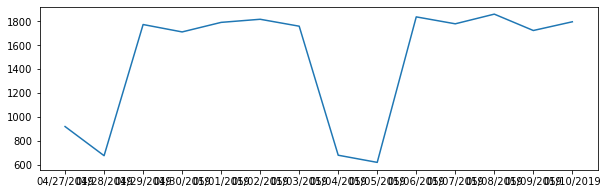

In [29]:
plt.figure(figsize=(10,3))
plt.plot(test_df[('DATE','')],test_df[('Total_Traffic','')])

## Challenge 6

In [30]:
data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time,Turnstile
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,00:00:00,REGULAR,7035249,2384833,2019-04-27 00:00:00,A002R05102-00-0059 ST
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,04:00:00,REGULAR,7035269,2384840,2019-04-27 04:00:00,A002R05102-00-0059 ST
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,08:00:00,REGULAR,7035292,2384875,2019-04-27 08:00:00,A002R05102-00-0059 ST
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,12:00:00,REGULAR,7035392,2384951,2019-04-27 12:00:00,A002R05102-00-0059 ST
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,16:00:00,REGULAR,7035651,2385020,2019-04-27 16:00:00,A002R05102-00-0059 ST


In [31]:
data.shape

(410945, 13)

In [32]:
station_entries = data.groupby(['DATE','STATION'], as_index = False).ENTRIES.agg(['max','min'])
station_exits = data.groupby(['DATE','STATION'], as_index = False).EXITS.agg(['max','min'])

In [33]:
station_entries['Daily Station Traffic'] = station_entries['max'] - station_entries['min']

In [34]:
station_exits['Daily Station Exits Traffic'] = station_exits['max'] - station_exits['min']

In [35]:
station_entries.head()

max      min  Daily Station Traffic
DATE       STATION                                                  
04/27/2019 1 AV            955342251   198884              955143367
           103 ST           36810311   574861               36235450
           103 ST-CORONA    15557711  1175636               14382075
           104 ST         2025897597   214366             2025683231
           110 ST           13871007  3490386               10380621

In [36]:
station_exits.head()

max      min  Daily Station Exits Traffic
DATE       STATION                                                        
04/27/2019 1 AV            998712585    23822                    998688763
           103 ST          505796597   777006                    505019591
           103 ST-CORONA    24501410   417639                     24083771
           104 ST         1907502735   137445                   1907365290
           110 ST           12483430  1378134                     11105296

In [37]:
station_grouped = data.groupby(['DATE','STATION'], as_index=False).agg({'ENTRIES': ['min', 'max'], 'EXITS': ['min', 'max']})

In [38]:
station_grouped[('ENTRIES','Station_Entries')] = station_grouped[('ENTRIES','max')] - station_grouped[('ENTRIES', 'min')]
station_grouped[('EXITS','Station_Exits')] = station_grouped[('EXITS','max')] - station_grouped[('EXITS', 'min')]
station_grouped[('Total_Traffic','')] = station_grouped[('ENTRIES','Station_Entries')] + station_grouped[('EXITS', 'Station_Exits')]

In [39]:
station_grouped.head()

DATE        STATION  ENTRIES                EXITS              \
                                  min         max      min         max   
0  04/27/2019           1 AV   198884   955342251    23822   998712585   
1  04/27/2019         103 ST   574861    36810311   777006   505796597   
2  04/27/2019  103 ST-CORONA  1175636    15557711   417639    24501410   
3  04/27/2019         104 ST   214366  2025897597   137445  1907502735   
4  04/27/2019         110 ST  3490386    13871007  1378134    12483430   

          ENTRIES         EXITS Total_Traffic  
  Station_Entries Station_Exits                
0       955143367     998688763    1953832130  
1        36235450     505019591     541255041  
2        14382075      24083771      38465846  
3      2025683231    1907365290    3933048521  
4        10380621      11105296      21485917

In [40]:
test_station = station_grouped[station_grouped.iloc[:,1] == '103 ST-CORONA']
station_grouped[('Date_Time','')] = pd.to_datetime(station_grouped[('DATE','')], cache=True)
station_grouped[('Week_Day','')] = station_grouped[('Date_Time','')].dt.weekday
station_grouped.head()
#station_grouped.reset_index()
#test_station.head()

DATE        STATION  ENTRIES                EXITS              \
                                  min         max      min         max   
0  04/27/2019           1 AV   198884   955342251    23822   998712585   
1  04/27/2019         103 ST   574861    36810311   777006   505796597   
2  04/27/2019  103 ST-CORONA  1175636    15557711   417639    24501410   
3  04/27/2019         104 ST   214366  2025897597   137445  1907502735   
4  04/27/2019         110 ST  3490386    13871007  1378134    12483430   

          ENTRIES         EXITS Total_Traffic  Date_Time Week_Day  
  Station_Entries Station_Exits                                    
0       955143367     998688763    1953832130 2019-04-27        5  
1        36235450     505019591     541255041 2019-04-27        5  
2        14382075      24083771      38465846 2019-04-27        5  
3      2025683231    1907365290    3933048521 2019-04-27        5  
4        10380621      11105296      21485917 2019-04-27        5

In [43]:
#test_station = station_grouped[station_grouped.iloc[:,1] == '103 ST-CORONA']
station_grouped.columns = ['DATE', 'STATION', 'ENTRIES_MIN', 'ENTRIES_MAX', 'EXITS_MIN', 'EXITS_MAX', 'ENTRIES', 'EXITS', 'Total_Traffic', 'Date_Time', 'Week_Day']
#test_station.head()
#Answer = test_station.groupby(['Week_Day','Date_Time']).Total_Traffic.sum()
#fig, ax = plt.subplots(figsize=(15,7))
#test_station.groupby(['Week_Day','Date_Time']).Total_Traffic.sum().unstack().plot(ax=ax)
#type(Answer)
#Answer.shape
#plt.plot(Answer)
Total_ridership = station_grouped.groupby(['STATION']).Total_Traffic.sum().reset_index()
type(Total_ridership)
Total_ridership


,STATION,Total_Traffic
0,1 AV,27353685298
1,103 ST,7577811995
2,103 ST-CORONA,538631469
3,104 ST,55062559967
4,110 ST,300900553
...,...,...
372,WOODLAWN,206052749
373,WORLD TRADE CTR,47726676453
374,WTC-CORTLANDT,10235357686
375,YORK ST,386311693


In [52]:
Total_ridership.sort_values(by=['Total_Traffic'],inplace = True, ascending = False)
Total_ridership
#plt.hist(Total_ridership['Total_Traffic'])

,STATION,Total_Traffic
72,47-50 STS ROCK,55472019311
3,104 ST,55062559967
179,CHAMBERS ST,54820025591
68,42 ST-PORT AUTH,54090317497
240,HIGH ST,53476720300
...,...,...
297,NEWARK BM BW,10444511
352,TOMPKINSVILLE,9380977
298,NEWARK C,7540694
327,RIT-MANHATTAN,5339173


(array([2., 2., 0., 0., 1., 0., 1., 1., 1., 2.]),
 array([5.03771384e+10, 5.08866265e+10, 5.13961146e+10, 5.19056027e+10,
        5.24150908e+10, 5.29245789e+10, 5.34340670e+10, 5.39435550e+10,
        5.44530431e+10, 5.49625312e+10, 5.54720193e+10]),
 <BarContainer object of 10 artists>)

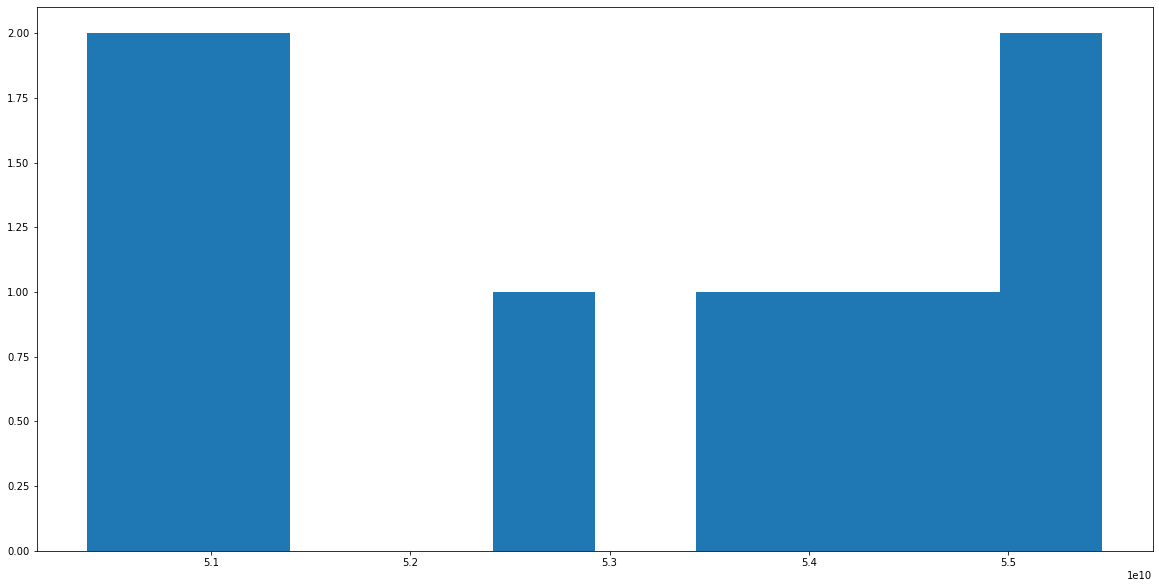

In [71]:
Row_list =[] 
indices = []
  
# Iterate over each row 
for index, rows in Total_ridership[:10].iterrows(): 
    # Create list for the current row 
#    my_list =[rows.STATION, rows.Total_Traffic] 
    my_list =rows.Total_Traffic 
    station_list = rows.STATION
    # append the list to the final list 
    Row_list.append(my_list) 
    indices.append(station_list)

Row_list    
#plt.ylim(50000000000,56000000000)
#plt.bar(Row_list) 
#plt.hist([[x for x in y] for y in Row_list])
plt.hist(Row_list)
#plt.xticks(rotation = 'vertical')


In [72]:
indices

['47-50 STS ROCK',
 '104 ST',
 'CHAMBERS ST',
 '42 ST-PORT AUTH',
 'HIGH ST',
 'CANAL ST',
 '183 ST',
 '14 ST',
 '23 ST',
 'ELMHURST AV']

<BarContainer object of 10 artists>

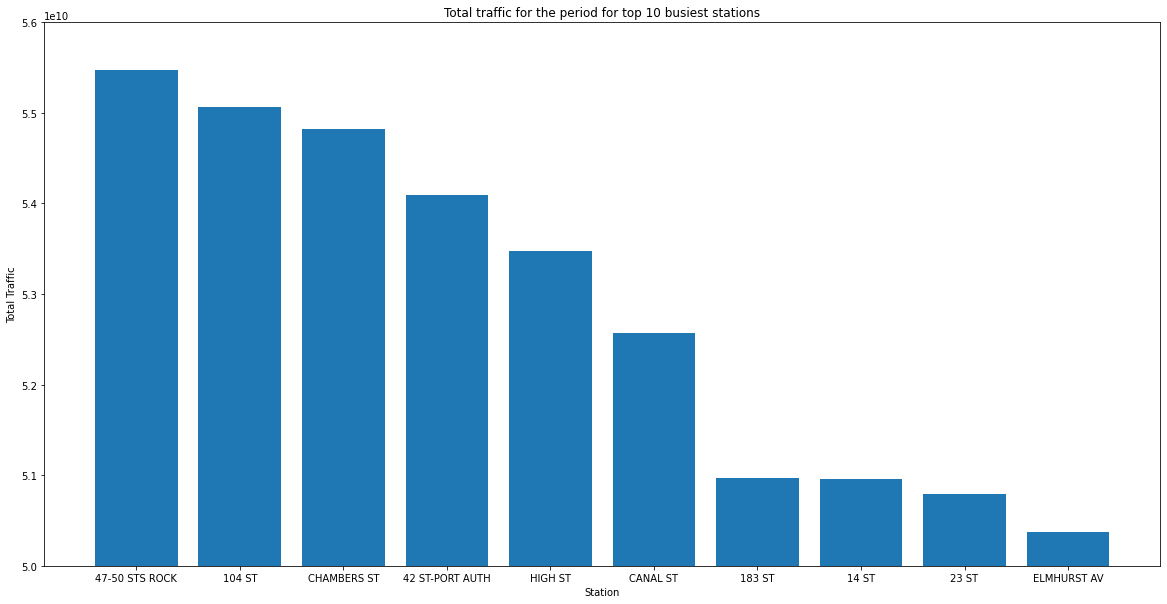

In [75]:
#indices = range(len(Row_list))
plt.ylim(50000000000,56000000000)
plt.xlabel("Station")
plt.ylabel("Total Traffic")
plt.title("Total traffic for the period for top 10 busiest stations")
plt.bar(indices, Row_list)

In [73]:
test_station.sort_values(by=[('Week_Day','')], inplace = True)

<ipython-input-73-f06c79419715>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_station.sort_values(by=[('Week_Day','')], inplace = True)


## Challenge 7

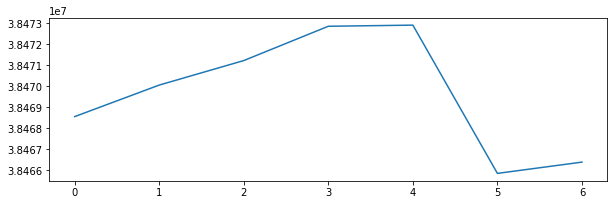

In [74]:
plt.figure(figsize=(10,3))
plt.plot(test_station[('Week_Day','')],test_station[('Total_Traffic','')])

### New CSV File

In [75]:
data2 = pd.read_csv('turnstile_190511.csv')
data2.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/04/2019,00:00:00,REGULAR,7044468,2387700
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/04/2019,04:00:00,REGULAR,7044495,2387706
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/04/2019,08:00:00,REGULAR,7044509,2387740
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/04/2019,12:00:00,REGULAR,7044568,2387757
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/04/2019,16:00:00,REGULAR,7044743,2387774
